In [1]:
!nvidia-smi

Wed Jun 15 12:49:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

** CNN implementation on the MNIST data set**

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
%matplotlib inline

Load DataSet

In [47]:
(x_train,y_train),(x_test, y_test) = mnist.load_data()

print(f"the size of the train set is {len(x_train)}")
print(f"the size of the test set is {len(x_test)}")


the size of the train set is 60000
the size of the test set is 10000


visulaing the some of the sample of the dataset

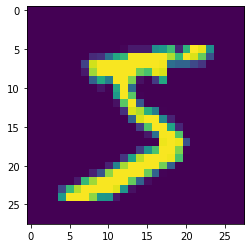

In [48]:
plt.imshow(x_train[0])

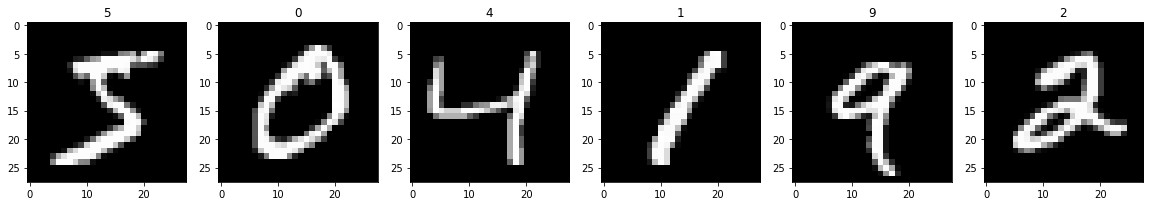

In [49]:
fig = plt.figure(figsize=(20,20))
for i in  range(6):
  ax = fig.add_subplot(1,6,i+1)
  ax.imshow(x_train[i],cmap="gray")
  ax.set_title(y_train[i])

In [50]:
x_train[0].shape

(28, 28)

Preprocess the input images : 
                             here we are resizing the pixel size by dividing each pixel in the image with 255

In [51]:
x_train, x_test = x_train/255, x_test/255

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


***encoding categorical integer labels using one-hot encoding***

In [52]:
 num_clases = 10
 print("integer_values_labels:")
 print(y_train[:10])

 y_train = np_utils.to_categorical(y_train,num_classes=num_clases)
 y_test = np_utils.to_categorical(y_test,num_clases)

print("1st 10 labels after encoded")
 print(y_train[:10])

integer_values_labels:
[5 0 4 1 9 2 1 3 1 4]
1st 10 labels after encoded
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


since the image are all gray-scale , we consider them as 1 channel in our cnn,
and actual size of each image is 28,28 and since we need to specify the channel also we are reshaping the images to 28,28,1 (height,width, channels)
*italicized text*

In [53]:
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)


In [58]:
print(x_train[0].shape)
print(x_train.shape)
print(x_test.shape)

(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Building and Training a CNN model over the this datasets**

In [59]:
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten

In [61]:
model = Sequential()


### adding 1st convolutional layer with 32 filters
model.add(Conv2D(filters=32, kernel_size=(3,3), activation = "relu",input_shape= (28,28,1)))  ### ---> we get 32 feature maps of shape 26,26,1 , therefore o/p of this layer (26,26,32)

### adding secong convolutional layyer with depth or filters = 64
model.add(Conv2D(filters=64, kernel_size=(3,3), activation = "relu")) ### ---> we get 64 feature maps of shape 24,24,1 , therefore o/p of this layer (24,24,64)

### adding third convolutional layyer with depth or filters = 128
model.add(Conv2D(filters=128, kernel_size=(3,3), activation = "relu")) ### ---> we get 128 feature maps of shape 22,22,1 , therefore o/p of this layer (22,22,64)

### addign the 1st maxpool layer ---> this reduces the dimension of the images
model.add(MaxPooling2D(pool_size=(2,2))) ### ---> we get 64 feature maps of shape 11,11,1 , therefore o/p of this layer (11,11,128)


model.add(Conv2D(filters=32, kernel_size=(3,3), activation = "relu"))  

model.add(Conv2D(filters=64, kernel_size=(3,3), activation = "relu")) 

model.add(Conv2D(filters=64, kernel_size=(3,3), activation = "relu")) 

model.add(Flatten())

model.add(Dense(64,activation="relu"))

model.add(Dense(10, activation = "softmax"))


In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 128)      0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 32)          36896     
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          18496     
                                                      

In [63]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])

In [64]:
history1 = model.fit(x_train,y_train, validation_data=(x_test,y_test), verbose = 1, batch_size=32, epochs = 12)

Epoch 1/12
1875/1875 [==============================] - 25s 7ms/step - loss: 0.1414 - accuracy: 0.9553 - val_loss: 0.0515 - val_accuracy: 0.9830
Epoch 2/12
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0474 - accuracy: 0.9863 - val_loss: 0.0318 - val_accuracy: 0.9904
Epoch 3/12
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0379 - accuracy: 0.9896 - val_loss: 0.0421 - val_accuracy: 0.9883
Epoch 4/12
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0336 - accuracy: 0.9910 - val_loss: 0.0366 - val_accuracy: 0.9900
Epoch 5/12
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0324 - accuracy: 0.9916 - val_loss: 0.0348 - val_accuracy: 0.9905
Epoch 6/12
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0293 - accuracy: 0.9932 - val_loss: 0.0323 - val_accuracy: 0.9936
Epoch 7/12
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0298 - accuracy: 0.9930 - val_loss: 0.0386 - val_ac

No handles with labels found to put in legend.


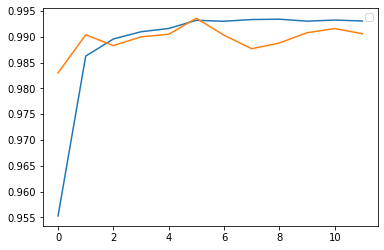

In [74]:
# history1.history

plt.plot(history1.history["accuracy"])
plt.plot(history1.history["val_accuracy"])
plt.legend()